# A/B Testing with ML

1. Experiment vs Control group

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
control_data = pd.read_csv("C:/Users/a653343/Downloads/control_group.csv", sep=';')

In [3]:
experiment_data=pd.read_csv("C:/Users/a653343/Downloads/test_group.csv", sep=';')

Exploratory Analaysis

In [4]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
experiment_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [6]:
experiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [7]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [8]:
control_data.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [9]:
control_data[control_data['# of Impressions'].isna()]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
experiment_data.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

Data Wrangling

In [11]:
# Combine with Experiment data
data_total = pd.concat([control_data, experiment_data])
data_total.sample(10)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
20,Control Campaign,21.08.2019,1803,74654.0,59873.0,5691.0,2711.0,2496.0,1460.0,800.0
17,Control Campaign,18.08.2019,1876,108452.0,96518.0,7253.0,2447.0,2115.0,1695.0,243.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
15,Test Campaign,16.08.2019,3076,106584.0,81389.0,6800.0,2661.0,2594.0,1059.0,487.0
26,Test Campaign,27.08.2019,2915,111469.0,92159.0,6435.0,2976.0,2552.0,992.0,771.0
8,Test Campaign,9.08.2019,2652,45511.0,31598.0,8259.0,2899.0,2761.0,1200.0,845.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
12,Test Campaign,13.08.2019,1972,65827.0,49531.0,7568.0,2213.0,2058.0,1391.0,812.0
28,Test Campaign,29.08.2019,2805,67444.0,43219.0,7651.0,1920.0,1240.0,1168.0,677.0


In [12]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [13]:
dummy_values = lb.fit_transform(data_total['Campaign Name'])

In [14]:
dummy_df = pd.DataFrame(dummy_values, columns=['Experiment'])

In [15]:
data_total.reset_index(drop=True,inplace=True)

In [16]:
data_total = pd.concat([data_total, dummy_df], axis=1)

In [17]:
data_total

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Experiment
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0,0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0,0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0,0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0


In [18]:
import numpy as np
np.random.seed(7)
import sklearn.utils

In [19]:
# Add row id
data_total['row_id'] = data_total.index
data_total

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Experiment,row_id
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0,0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0,1
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0,2
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0,3
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,0,5
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0,0,6
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0,0,7
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0,0,8
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0,9


In [20]:
# Create a Day of Week feature
data_total['DOW'] = data_total['Date'].str.slice(start=0, stop=3).astype(float)

In [21]:
# Remove missing data
data_total.dropna(inplace=True)

In [22]:
data_total

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Experiment,row_id,DOW
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0,0,1.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0,1,2.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0,2,3.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0,3,4.0
5,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,0,5,6.0
6,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0,0,6,7.0
7,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0,0,7,8.0
8,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0,0,8,9.0
9,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0,0,9,10.0
10,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0,0,10,11.0


In [23]:
data_total = data_total.drop(columns=['Date','Campaign Name'])

In [24]:
# Shuffle the data
data_total = sklearn.utils.shuffle(data_total)

In [25]:
# Check the new data
data_total.head()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Experiment,row_id,DOW
32,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,578.0,1,32,3.0
21,2939,105705.0,86218.0,6843.0,3102.0,2988.0,819.0,387.0,0,21,22.0
47,1979,53632.0,43241.0,6909.0,2824.0,2522.0,461.0,257.0,1,47,18.0
18,2596,107890.0,81268.0,3706.0,2483.0,2098.0,908.0,542.0,0,18,19.0
11,2319,116639.0,100189.0,2993.0,1397.0,1147.0,1439.0,794.0,0,11,12.0


In [26]:
# Splitting the data
#split the data into testing and training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_total.loc[:, data_total.columns != '# of Purchase'],\
                                                    data_total['# of Purchase'], test_size=0.2)

In [27]:
X_train.head()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,Experiment,row_id,DOW
20,1803,74654.0,59873.0,5691.0,2711.0,2496.0,1460.0,0,20,21.0
15,2024,71274.0,42859.0,5224.0,2427.0,2158.0,1613.0,0,15,16.0
29,2324,111306.0,88632.0,4658.0,1615.0,1249.0,442.0,0,29,30.0
39,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,1,39,10.0
51,2899,34752.0,27932.0,4431.0,1983.0,1131.0,367.0,1,51,22.0


In [28]:
X_test.head()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,Experiment,row_id,DOW
43,2537,56304.0,25982.0,3993.0,1979.0,1059.0,779.0,1,43,14.0
32,2365,70263.0,45198.0,7885.0,2572.0,2367.0,1268.0,1,32,3.0
52,2407,60286.0,49329.0,5077.0,2592.0,2004.0,632.0,1,52,23.0
59,1977,120203.0,89380.0,4399.0,2978.0,1625.0,1034.0,1,59,30.0
21,2939,105705.0,86218.0,6843.0,3102.0,2988.0,819.0,0,21,22.0


Helper Functions

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Enrollments')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

Linear regression: A baseline

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 20 to 25
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Spend [USD]          47 non-null     int64  
 1   # of Impressions     47 non-null     float64
 2   Reach                47 non-null     float64
 3   # of Website Clicks  47 non-null     float64
 4   # of Searches        47 non-null     float64
 5   # of View Content    47 non-null     float64
 6   # of Add to Cart     47 non-null     float64
 7   Experiment           47 non-null     int32  
 8   row_id               47 non-null     int64  
 9   DOW                  47 non-null     float64
dtypes: float64(7), int32(1), int64(2)
memory usage: 3.9 KB


In [32]:
import statsmodels.api as sm

X_train_refined = X_train.drop(columns=['row_id'], axis=1)
linear_regression = sm.OLS(y_train, X_train_refined)
linear_regression = linear_regression.fit()

In [33]:
X_test_refined = X_test.drop(columns=['row_id'], axis=1)
y_preds = linear_regression.predict(X_test_refined)

In [34]:
calculate_metrics(y_test, y_preds)

RMSE Score: 157.7527927655677
R2_Squared: -0.003199443373524735
MAE Score: 114.85764487972624


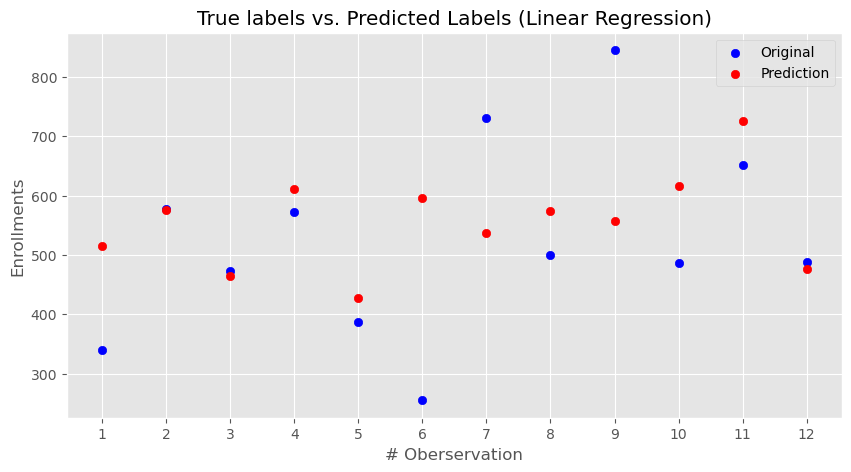

In [35]:
plot_preds(y_test, y_preds, 'Linear Regression')

In [36]:
print(linear_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:          # of Purchase   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              35.29
Date:                Thu, 09 May 2024   Prob (F-statistic):                    9.17e-16
Time:                        09:51:46   Log-Likelihood:                         -311.51
No. Observations:                  47   AIC:                                      641.0
Df Residuals:                      38   BIC:                                      657.7
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

The R2 measures the proportion of how the dependent variable can be explained by the independent variables, from 0-1 where 0 indicates no relationship and 1 indicates it is responsible for all the variance. 
The adjusted R2 accounts for additional variables, adjusting according to the number of predictors in the model and helps to avoid overfitting, a more accurate measure of fit.

In [37]:
pd.DataFrame(linear_regression.pvalues)\
    .reset_index()\
    .rename(columns={'index':'Terms', 0:'p_value'})\
    .sort_values('p_value')

,Terms,p_value
6,# of Add to Cart,0.002351
7,Experiment,0.211137
0,Spend [USD],0.324049
3,# of Website Clicks,0.415638
4,# of Searches,0.733031
2,Reach,0.772364
5,# of View Content,0.843527
1,# of Impressions,0.869159
8,DOW,0.875004


The p-value helps indicate whether the null hypothesis should be rejected or accepted. If the p value > 0.05, then it's a good indicator that the null hypothesis should be accepted. In this case, the only p-value that is statsically significant is # of Aa to Cart. 

Model 2: Decision Tree

Decision Trees support non linearity, and are better a predicting categorical independent variables such as gender, marital status. 

In [38]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)

calculate_metrics(y_test, y_preds)

RMSE Score: 209.53712509714268
R2_Squared: -0.7699260916005111
MAE Score: 148.5995670995671


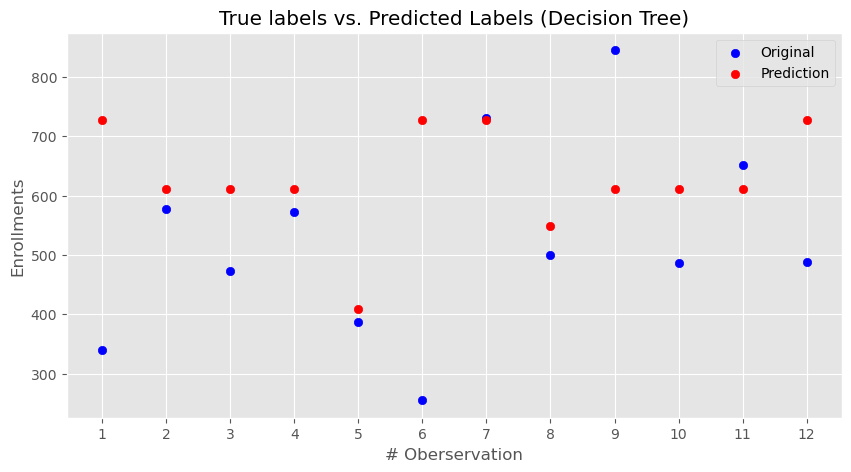

In [39]:
plot_preds(y_test, y_preds, 'Decision Tree')

In [112]:
%pip install pydotplus

ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/60/bf/62567830b700d9f6930e9ab6831d6ba256f7b0b730acb37278b0ccdffacf/pydotplus-2.0.2.tar.gz (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1006)')))



In [41]:
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, 
                feature_names=X_train_refined.columns,
                filled=True, rounded=True,
                special_characters=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

Model XG Boost

In [42]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

In [ ]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [ ]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [ ]:
xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

In [ ]:
calculate_metrics(y_test, y_preds)

In [ ]:
plot_preds(y_test, y_preds, 'XGBoost')